### Create half-gaussian meridional wind pulse 

* Spatially uniform wind stress applied in the meridional direction of the domain bahia_01_noShelf (240x180 grid points).
* Generate meridional binary file for windstress.
* Gaussian pulse, e-fold of value `sigma`, max windstress of `max_tau`, centered in time around `center`
* In namelist `data`, variable `ExternalForcingCycle` should match `end_time*3600` (`end_time` in seconds) and `ExternalForcingPeriod` should be equal to `(end_time*3600)/nt`.
* If you are using this forcing file, your run should not exceed `end_time` hoursin simulation time because the forcing will start again after that time (E.g. if end_time is 10 hrs, a new wind event will start again after 10 hours). If you wish to run for longer, restart from pickup files and comment out the external frocing options in `data`.

In [1]:
20*3600/60

1200.0

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### INPUT

Only change these values

In [3]:
## Gaussian pulse
nt = 60 # number of wind records
end_time = 24 # end time of records (hrs) - Should be the same as ExternalForcingCycle (in seconds) in data namelist
t = np.linspace(0, end_time, nt) # time array of wind records
max_tau =  0.1 # original 0.1
sigma = 1
center = 2.5 # base 3.5 hr, faster 2.5 hr, slower 4.5
gauss = max_tau * np.exp(-((t-center)**2)/(2*sigma))
mask = t > center
gauss[mask] = 0

## Grid size
nx = 272 # domain bahia01_expand: 272
ny = 320 # domain bahia01_expand: 320  

# filename
run_desc = 'halfgauss2p5hr' # descriptive string to add to wind filename. 
                            # Final name is eg. zonal_halfgauss2p5hr_240x180.bin 

### Make wind stress array

This is your half gaussian pulse
0.004393693362340742


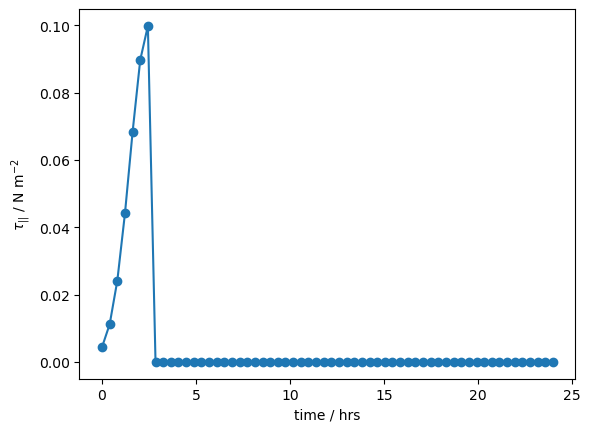

In [4]:
### Plot gaussian
plt.plot(t,gauss,'-o')
plt.xlabel('time / hrs')
plt.ylabel(r'$\tau_{||}$ / N m$^{-2}$')
file_path = "/Users/estebancruz/MITgcm/verification/BayIW/input/tau_simulation.png"
plt.savefig(file_path, dpi=300)
print('This is your half gaussian pulse')
print(gauss[0])

In [5]:
windstress= np.expand_dims(np.expand_dims(gauss,0),0) + np.zeros((nx,ny,nt))
alpha = np.radians(90) # Meridional winds directed to the north need 90deg rotation
#zonal_tau = windstress*np.cos(alpha)
merid_tau = windstress*np.sin(alpha)

In [6]:
### Write binary files
dt = np.dtype('>f8')  # float 64 big endian

wind_fname1 = 'merid_%s_%dx%d.bin' %(run_desc,nx,ny)
fileobj = open(wind_fname1, mode='wb')
dd=merid_tau.transpose((2,1,0))
dd.astype(dt).tofile(fileobj,"")
fileobj.close()

(5222400,)


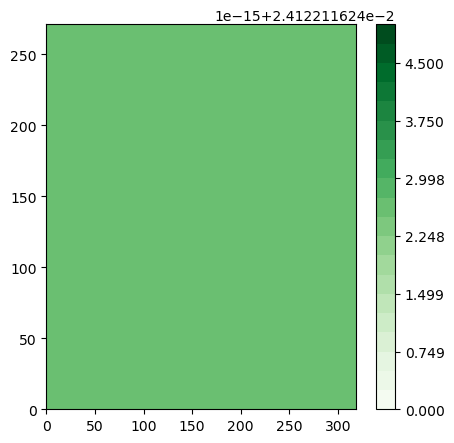

In [7]:
# Check that bin file works when read by MITgcm

cc=np.fromfile(wind_fname1, dtype=dt)
print(np.shape(cc))

bF=np.reshape(cc,[nx,ny,nt],'F') # F to read in Fortran order

fig,ax = plt.subplots(1,1, figsize=(5,5))

pc = ax.contourf(bF[:,:,2], 20, cmap='Greens')
plt.colorbar(pc,ax=ax)

(0.0, 24.0)

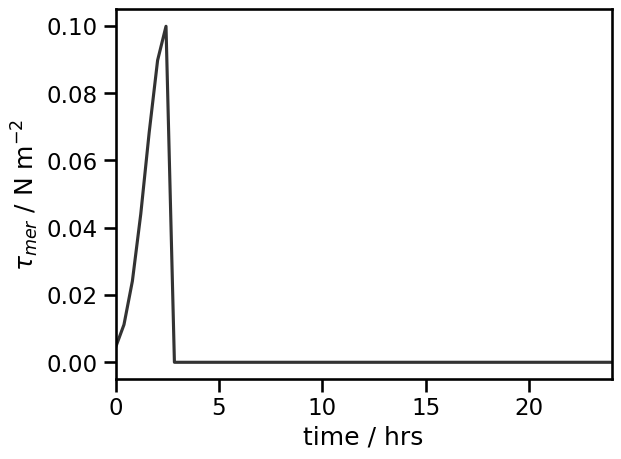

In [8]:
# Make a plot for talks
import seaborn as sns

sns.set_context('talk')
plt.plot(t, gauss, '-', color='0.2')
plt.xlabel('time / hrs')
plt.ylabel(r'$\tau_{mer}$ / N m$^{-2}$')
plt.xlim(0,end_time)

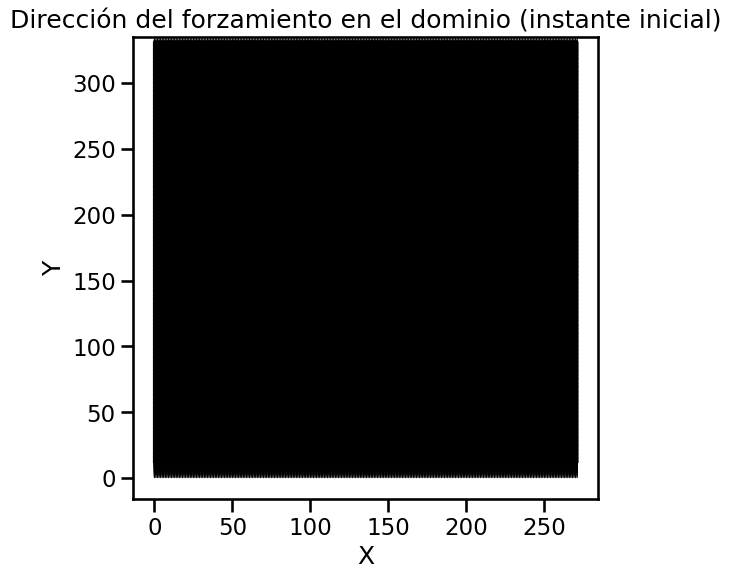

In [9]:
# Supongamos que tienes zonal_tau y merid_tau
X, Y = np.meshgrid(np.arange(nx), np.arange(ny))
U = np.zeros_like(windstress[:,:,0])  # zonal_tau debería ser cero
V = merid_tau[:,:,0]  # Primer instante de tiempo

plt.figure(figsize=(6,6))
plt.quiver(X, Y, U, V, scale=0.1)
plt.title("Dirección del forzamiento en el dominio (instante inicial)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [10]:
x=(np.array([1.0, 1.0, 1.1, 1.1, 1.2, 1.2, 1.3, 1.3, 1.4,
	1.5, 1.5, 1.6, 1.7, 1.7, 1.8, 1.9, 2.0,
	2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
	2.9, 3.0, 3.1, 3.2, 3.4, 3.5, 3.7, 3.8,
	4.0, 4.2, 4.4, 4.5, 4.7, 4.9, 5.2, 5.4,
	5.6, 5.8, 6.1, 6.4, 6.6, 6.9, 7.2, 7.5,
	7.8, 8.2, 8.5, 8.9, 9.3, 9.7, 10.1, 10.5,
	11.0, 11.4, 11.9, 12.5, 13.0, 13.5, 14.1, 14.7,
	15.4, 16.0, 16.7, 17.4, 18.2, 19.0, 19.8, 20.6,
	21.5, 22.4, 23.4, 24.4, 25.4, 26.5, 27.7, 28.9,
	30.1, 31.4, 32.7, 34.2, 35.6, 37.1, 38.7, 40.5,
	42.2]))

In [11]:
len(x)

90